In [9]:
import InputList
import importlib
importlib.reload(InputList)

<module 'InputList' from '/home/julius/dataspellprojects/oct-classifier/InputList.py'>

In [10]:
import random
import numpy as np
import os

In [11]:
itemsize = 2
b_size = 2048
c_size = 2044
a_size = 1536

ascan_from_file = 10  # 100 = 0.0023 % of A-Scans

In [12]:
all_ascans = []
for file, label in InputList.healthy_training_files:
    with open(file, "rb") as f:
        for repetition in range(ascan_from_file):
            ascan_from_index = random.randint(0, 2 * b_size * c_size)
            print(ascan_from_index)
            #ascan_from_index = 2 * b_size * c_size - 1
            index_in_file = itemsize * ascan_from_index * a_size
            f.seek(index_in_file, os.SEEK_SET)
            read_from_file = np.fromfile(f, dtype=np.dtype('<u2'), count=a_size)
            all_ascans.append(read_from_file)

379878
3209515
5892700
8139357
7266408
2340235
4783602
2862853
1331735
6312471
2840386
7160048
2704622
3062515
6175532
6234429
5155957
1743845
7008776
5556007
292548
2556136
2428506
2418984
2448701
2346983
3744983
4966980
4763808
4684732
5419250
5791352
1219929
7467588
957302
547818
5908135
2435214
5224187
4547764
3584737
2534629
1714753
3398027
4596455
5142885
3047260
1622699
2236460
1748284
663613
854389
1723215
6966166
7824509
1101359
6266969
6140524
7842613
1370434
2075087
2504069
5819205
1848377
7906191
2047329
3077310
3579613
4257090
5117995
7688178
4628110
8057687
1147937
1334286
2294517
1871130
5801765
3888973
7336150


In [13]:
with open(file, "rb") as f:
    ascan_from_index = 2 * b_size * c_size - 1
    index_in_file = itemsize * ascan_from_index * a_size
    f.seek(index_in_file, os.SEEK_SET)
    read_from_file = np.fromfile(f, dtype=np.dtype('<u2'), count=a_size)
    all_ascans[-1] = read_from_file

In [121]:
one_bscan_bkp = []
with open(file, "rb") as f:
    ascan_from_index = 2 * b_size * (c_size - 1)
    for i in range(2048):
        index_in_file = itemsize * (ascan_from_index + i) * a_size
        f.seek(index_in_file, os.SEEK_SET)
        read_from_file = np.fromfile(f, dtype=np.dtype('<u2'), count=a_size)
        one_bscan_bkp.append(read_from_file)

In [71]:
one_bscan.shape

AttributeError: 'list' object has no attribute 'shape'

(-0.5, 511.5, 1135.5, -0.5)

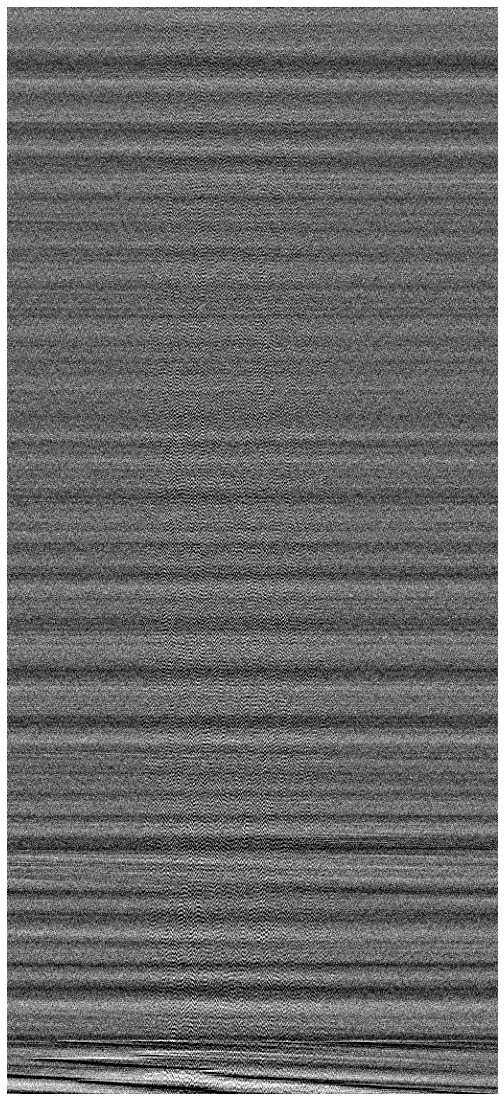

In [123]:
plt.figure(figsize=(20, 20))
plt.imshow(np.array(one_bscan_bkp).transpose()[400:, ::4], cmap="gray", vmin=30000, vmax=37000)
plt.grid(False)
plt.axis("off")

(-0.5, 511.5, 1135.5, -0.5)

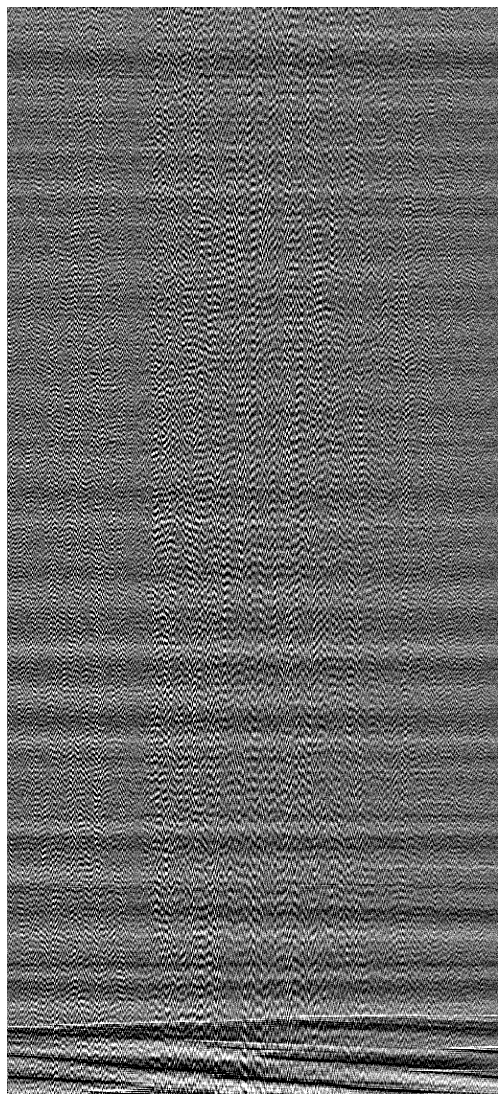

In [120]:
plt.figure(figsize=(20, 20))
plt.imshow(np.array(one_bscan).transpose()[400:, ::4], cmap="gray", vmin=30000, vmax=37000)
plt.grid(False)
plt.axis("off")

In [112]:
raw_bscan = np.array(one_bscan).transpose()
image_bscan = np.fft.fft(raw_bscan, axis=0)

(-0.5, 2047.5, 1534.5, -0.5)

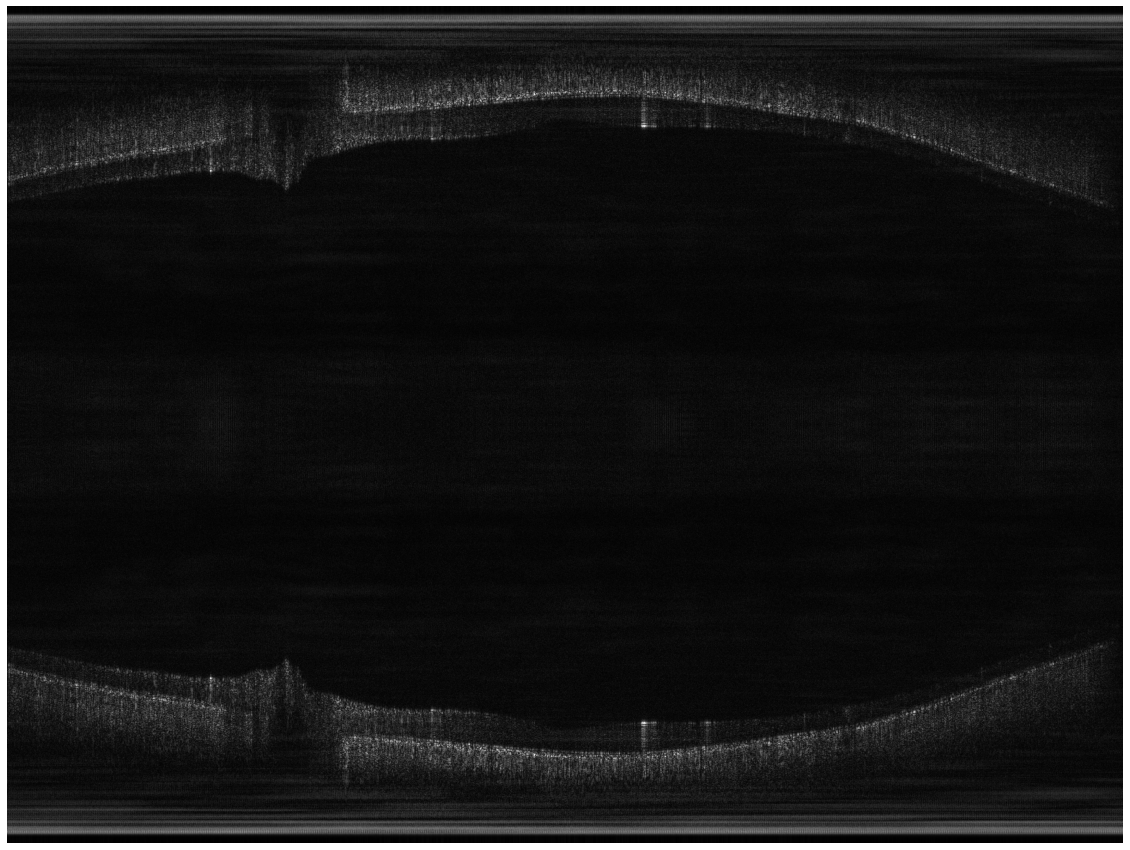

In [113]:
plt.figure(figsize=(20, 20))
plt.imshow(np.abs(image_bscan)[1:], cmap="gray", vmin=0, vmax=1e6)
plt.grid(False)
plt.axis("off")

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from numpy.fft import ifft, fft
import matplotlib.pyplot as plt

In [ ]:
background = all_ascans[-1][400:1400]

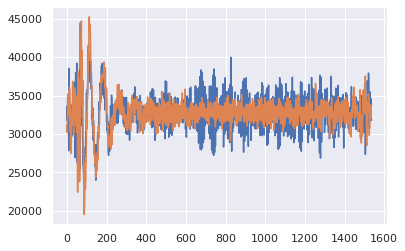

In [15]:
plt.plot(all_ascans[1])
plt.plot(all_ascans[-1])

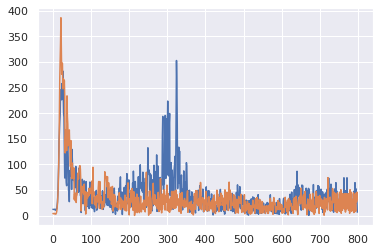

In [16]:
plt.plot(np.abs(ifft(all_ascans[1]))[1:800])
plt.plot(np.abs(ifft(all_ascans[-1]))[1:800])

In [344]:
bandwith = 75
central = 1060

(2 * np.log(2) * central**2) / (np.pi * bandwith)

6610.830942173849

In [356]:
def receive(k):
    distance = np.linspace(-np.pi, np.pi, 1000)
    return np.cos(2*np.pi*k*distance)

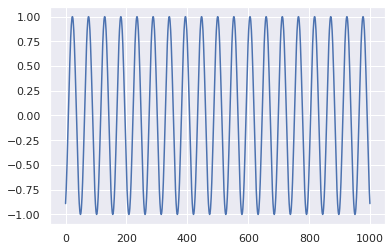

In [364]:
plt.plot(receive(3))

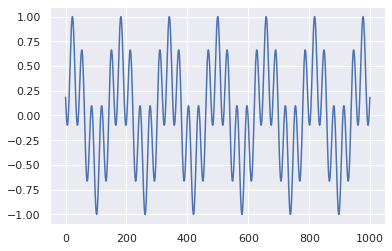

In [375]:
plt.plot(receive(2) * receive(3))

In [369]:
a = np.linspace(0, 1000, 1000)
b = list(map(receive, a))

In [372]:
b = np.array(b)

In [373]:
b.shape

(1000, 1000)

In [374]:
plt.plot(np.sum(b, axis=0))

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

#sns.set_theme()
fig, ax = plt.subplots(1, 2, figsize=(30, 12))
ax[1].plot(np.abs(ifft(all_ascans[1]))[1:800])
ax[1].plot(np.abs(ifft(all_ascans[-1]))[1:800])
ax[1].legend(["Image Retina", "Image Background"])
ax[0].plot(all_ascans[1])
ax[0].plot(all_ascans[-1])
ax[0].set_xlabel("Wavenumber k")
ax[1].set_xlabel("Imaging Depth")
ax[0].set_ylabel("Intensity")
ax[1].set_ylabel("Intensity")
#ax[0].legend(["Spectral Retina", "Spectral Background"], prop={'size': 26})
ax[0].legend(["Spectral Retina", "Spectral Background"])
fig.savefig("test.png", dpi=120)

In [5]:
for file, label in InputList.healthy_training_files[:1]:
    with open(file, "rb") as f:
        #middle_index = 3465590
        middle_index = 3465590 + 400000
        start = -1024
        b_scan1 = []
        for i in range(2048*8):
            index = middle_index + start + i
            index_in_file = itemsize * index * a_size
            f.seek(index_in_file, os.SEEK_SET)
            a = np.fromfile(f, dtype=np.dtype('<u2'), count=a_size)
            a = a - np.mean(a)
            b_scan1.append(np.abs(ifft(a[400:1400]))[int(1000/2):])
        b_scan1 = np.array(b_scan1)

NameError: name 'InputList' is not defined

In [293]:
2048/8

256.0

In [298]:
b_scan2 = np.mean(b_scan1.transpose().reshape((500, 8, 2048)), axis=1)
b_scan2.shape

(500, 2048)

In [376]:
plt.figure(figsize=(30, 10))
plt.imshow(b_scan1.transpose()[:, ::], "gray")

In [377]:
path2 = "/mnt/p_Zeiss_Clin/Projects/UWF OCTA/Clinical data/MOON1/D116/links/raw_1536x2048x2044x2_22910.bin"
for file in [path2]:
    with open(file, "rb") as f:
        #middle_index = 3465590
        middle_index = 2048*1950 + 1024
        start = -1024
        b_scan1 = []
        for i in range(2048):
            index = middle_index + start + i
            index_in_file = itemsize * index * a_size
            f.seek(index_in_file, os.SEEK_SET)
            a = np.fromfile(f, dtype=np.dtype('<u2'), count=a_size)
            a = a - np.mean(a)
            b_scan1.append(np.abs(ifft(a[400:1400]))[int(1000/2):])
        b_scan1 = np.array(b_scan1)
        b_scan2 = []
        for i in range(2048, 2*2048):
            index = middle_index + start + i
            index_in_file = itemsize * index * a_size
            f.seek(index_in_file, os.SEEK_SET)
            a = np.fromfile(f, dtype=np.dtype('<u2'), count=a_size)
            a = a - np.mean(a)
            b_scan2.append(np.abs(ifft(a[400:1400]))[int(1000/2):])
        b_scan2 = np.array(b_scan2)
        b_scan3 = []
        for i in range(2*2048, 3*2048):
            index = middle_index + start + i
            index_in_file = itemsize * index * a_size
            f.seek(index_in_file, os.SEEK_SET)
            a = np.fromfile(f, dtype=np.dtype('<u2'), count=a_size)
            a = a - np.mean(a)
            b_scan3.append(np.abs(ifft(a[400:1400]))[int(1000/2):])
        b_scan3 = np.array(b_scan3)


In [378]:
sns.set_theme(style="white")
plt.figure(figsize=(30, 10))
plt.imshow((np.log((b_scan2-b_scan1)**2+(b_scan2-b_scan3)**2+(b_scan1-b_scan3)**2)).transpose()[:, ::], "gray")

In [477]:
for file, label in InputList.healthy_training_files[:1]:
    with open(file, "rb") as f:
        #middle_index = 3465590
        middle_index = 2048*1950 + 1024
        start = -1024
        b_scan1 = []
        for i in range(2048):
            index = middle_index + start + i
            index_in_file = itemsize * index * a_size
            f.seek(index_in_file, os.SEEK_SET)
            a = np.fromfile(f, dtype=np.dtype('<u2'), count=a_size)
            a = a - np.mean(a)
            b_scan1.append(np.abs(ifft(a[400:1400]))[int(1000/2):])
        b_scan1 = np.array(b_scan1)

In [396]:
b_scan1.shape

(2048, 500)

In [404]:
import skimage.filters as sk_fi

In [411]:
pca = PCA(n_components=204)
#b_scan_pp = sk_fi.gaussian(b_scan1, sigma=1)
b_scan_pp = sk_fi.median(b_scan1, np.ones((4, 4)))
b_scan_pp = b_scan_pp
pca.fit(b_scan_pp)
reduced_data = pca.transform(b_scan_pp)
recovered_data = pca.inverse_transform(reduced_data)

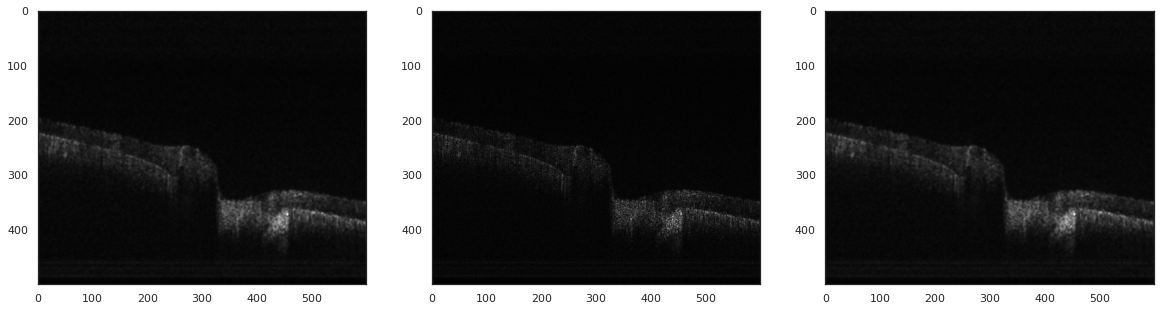

In [452]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(recovered_data.transpose()[:, 200:800], "gray")
ax[1].imshow(b_scan1.transpose()[:, 200:800], "gray")
ax[2].imshow(b_scan_pp.transpose()[:, 200:800], "gray")


In [453]:
test = np.mean(b_scan_pp, axis=1)
fft_test = fft(test)
plt.plot(fft_test[1:])

/home/julius/miniconda3/envs/tf-test/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [434]:
b_scan1.shape

(2048, 500)

In [479]:
fft_test = fft(b_scan1, axis=0)
fft_test[200:1700] = 0
fft_test[512] = 0
fft_test[1024+512] = 0
plt.plot(np.mean(fft_test[1:], axis=1))
test_revert = ifft(fft_test, axis=0).real
fig, ax = plt.subplots(1, 2, figsize=(50, 20))
ax[0].imshow(test_revert.transpose()[:, :], "gray")
ax[1].imshow(b_scan1.transpose()[:, :], "gray")

/home/julius/miniconda3/envs/tf-test/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [471]:
test_revert

array([[57.31532812,  4.68406183, 31.51760575, ...,  8.97645413,
         7.78971432,  8.05487219],
       [11.96051562, 29.13084961, 59.51534929, ..., 10.7569125 ,
        11.64146471, 10.35952687],
       [15.34301563, 19.82598782, 25.62621351, ..., 12.1093281 ,
        10.52851109, 10.0812423 ],
       ...,
       [25.84851562, 15.8540081 , 48.94297716, ..., 10.61420117,
        11.37426003, 10.27559737],
       [30.35101562, 56.0050092 , 28.89090717, ...,  4.63551099,
         5.18515221,  6.56293116],
       [33.55714063, 22.29816326, 42.85520637, ...,  6.47095376,
         8.11516621,  6.01834162]])

In [472]:
b_scan1

array([[58.624     ,  4.97225582, 30.58353883, ...,  9.98030062,
         8.81173199,  8.9659479 ],
       [11.68      , 28.7083007 , 58.90722948, ...,  9.29567469,
        10.24525859,  9.03180624],
       [15.072     , 19.39937184, 25.42541638, ..., 12.43446189,
        10.81438003, 10.43919385],
       ...,
       [25.568     , 15.43145919, 48.33485736, ...,  9.15296335,
         9.97805391,  8.94787674],
       [30.08      , 55.57839322, 28.69011003, ...,  4.96064478,
         5.47102115,  6.92088272],
       [32.8       , 22.85913415, 44.59819022, ...,  6.6032113 ,
         8.20348572,  6.07703499]])

In [385]:
plt.figure(figsize=(30, 10))
plt.imshow(recovered_data.transpose()[:, ::], "gray")

In [272]:
path2 = "/mnt/p_Zeiss_Clin/Projects/UWF OCTA/Clinical data/MOON1/D116/links/raw_1536x2048x2044x2_22910.bin"
for file in [path2]:
    with open(file, "rb") as f:
        #middle_index = 3465590
        middle_index = 2048*2000 + 1024
        start = -1024
        b_scan = []
        for i in range(2048):
            index = middle_index + start + i
            index_in_file = itemsize * index * a_size
            f.seek(index_in_file, os.SEEK_SET)
            a = np.fromfile(f, dtype=np.dtype('<u2'), count=a_size)
            a = a - np.mean(a)
            b_scan.append(np.abs(ifft(a[400:1400]))[int(1000/2):])
        b_scan = np.array(b_scan)
plt.figure(figsize=(30, 10))
plt.imshow(b_scan.transpose()[:, ::], "gray")

In [190]:
#all_ascans = np.array(all_ascans)
all_ascans_crop = all_ascans[:, 400:1401]
all_ascans_transformed = np.abs(fft.ifft(all_ascans_crop))[:, 1:]
all_ascans_transformed.shape

TypeError: list indices must be integers or slices, not tuple

In [428]:
2 * b_size * c_size / 4

2093056.0

In [466]:
pca = PCA(n_components=51)
pca.fit(all_ascans_transformed[::10])
reshaped_instance_reduced = pca.transform(all_ascans_transformed)
reduced_ascans = pca.inverse_transform(reshaped_instance_reduced)

In [477]:
reshaped_instance_reduced_2 = (reshaped_instance_reduced - reshaped_instance_reduced[::100].mean()) / reshaped_instance_reduced[::100].std()

In [484]:
list(range(0, 5, 3))

[1, 4]

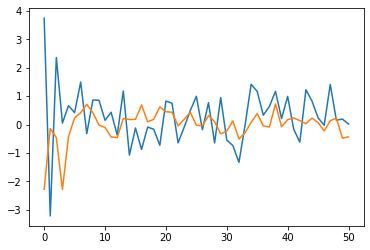

In [478]:
i1 = random.randint(0, 801)
plt.plot(reshaped_instance_reduced_2[i1])
i2 = random.randint(0, 801)
#plt.plot(reshaped_instance_reduced_2[i2])
plt.plot(reshaped_instance_reduced_2[-1])

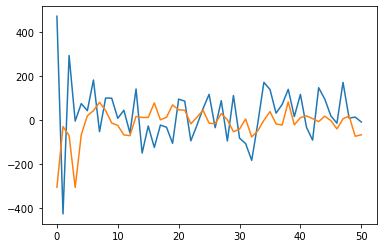

In [479]:
plt.plot(reshaped_instance_reduced[i1])
#plt.plot(reshaped_instance_reduced[i2])
plt.plot(reshaped_instance_reduced[-1])

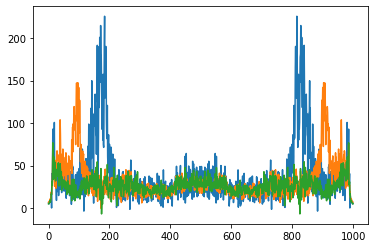

In [480]:
plt.plot(reduced_ascans[i1])
plt.plot(reduced_ascans[i2])
plt.plot(reduced_ascans[-1])

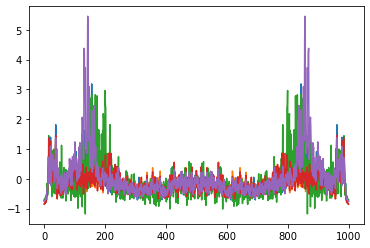

In [439]:
plt.plot(reduced_ascans_2[i1])
plt.plot(reduced_ascans_2[i2])
plt.plot(reduced_ascans_2[i3])
plt.plot(reduced_ascans_2[-1])
plt.plot(reduced_ascans_2[-2])

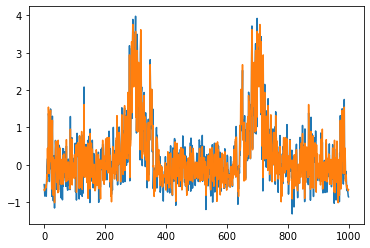

In [413]:
plt.plot(reduced_ascans_3[i3])
plt.plot(reduced_ascans_2[i3])

In [415]:
plt.plot(all_ascans_transformed_2[i1][1:])
plt.plot(all_ascans_transformed_2[i2][1:])
plt.plot(all_ascans_transformed_2[i3][1:])
plt.plot(all_ascans_transformed_2[-1][1:])
plt.plot(all_ascans_transformed_2[-2][1:])

In [353]:
plt.plot(all_ascans_transformed_2[i1][1:])
plt.plot(all_ascans_transformed_2[i2][1:])
plt.plot(all_ascans_transformed_2[i3][1:])
plt.plot(all_ascans_transformed_2[-1][1:])
plt.plot(all_ascans_transformed_2[-2][1:])